# Overview.
Wind turbine power output is known for having a strong correlation with wind speed. In this project, Simple Linear Regression was built for predicting the turbine response for a given wind speed.  this project will be completed using:

a method from NumPy package that performs least squares fit to data. 
a function from SciPy that uses non-linear least squares to fit a function f to data. 
The notebook also includes an analysis of a data set powerproduction and its preprocessing.

The performance evaluation of the models was conducted using two metrics - R-squared regression score  and Root Mean Squared Error (RMSE). The indicators of a good model are low RMSE and high R-squared regression score.

In [1]:
# Numerical arrays.
import numpy as np

# Models.
from numpy.polynomial.polynomial import Polynomial as poly
from scipy.optimize import curve_fit

# Data frames.
import pandas as pd

from scipy import stats
# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.titlesize"] = 18

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

# Reading the Data and Performing Basic Data Checks.

In [3]:
df = pd.read_csv("powerproduction.txt")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has 500 rows and 2 columns with two numerical variables, speed and power, which are represented by real numbers. There are no empty values in the data set

In [4]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The mean speed is 12.59, while the mean power stands at 48.01. Moreover, there is a difference in the scale of the variables: speed has a range between 0.00 to 25.00 and power - between 0.00 and 113.556. This difference will be addressed in the preprocessing.

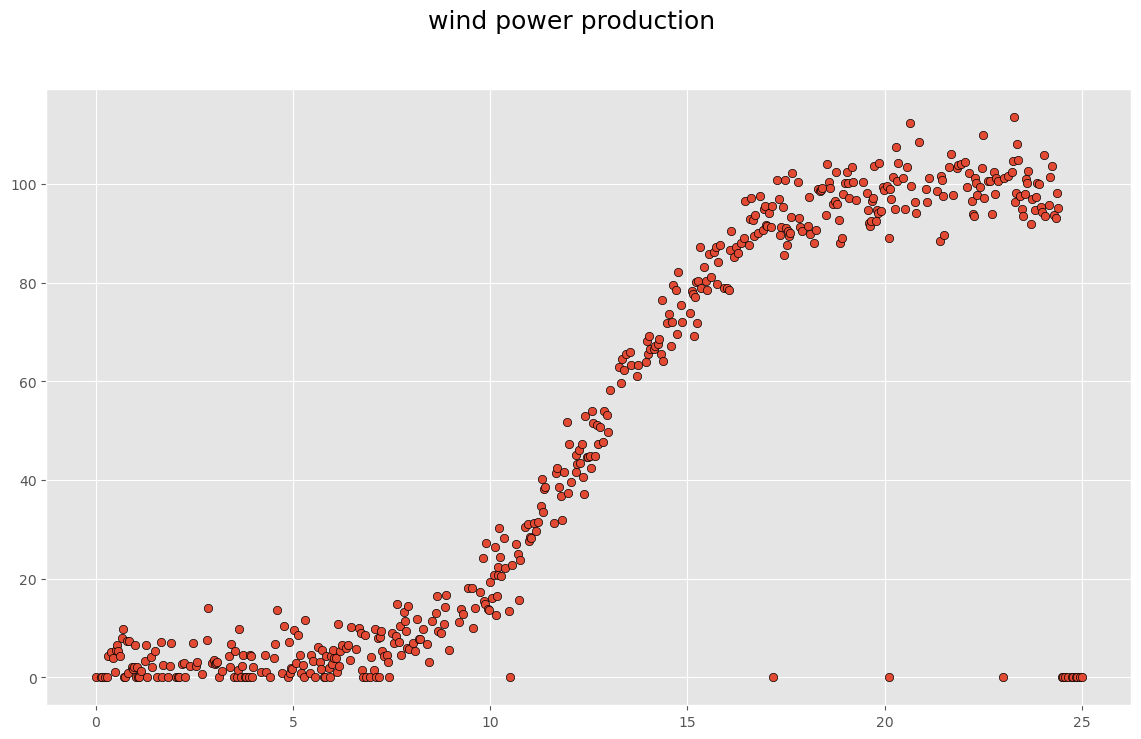

In [5]:
fig, ax = plt.subplots()
fig.suptitle("wind power production")
ax.scatter(df.speed, df.power, edgecolor="black")
plt.show()

The above plot shows that the relationship between Power and Speed predominantly takes an "S"-shape. The power rises dramatically with speed at about 8 m/s and slows when the speed reaches approximately 17 m/s.

Additionally, we can see some outliers where the speed is between 5 m/s and 24 m/s, approximately. However, the power is still 0. The 0 power points for around 25 m/s wind speed may result from shutting down the wind turbine to mitigate damage, and so I will not consider them as outliners.



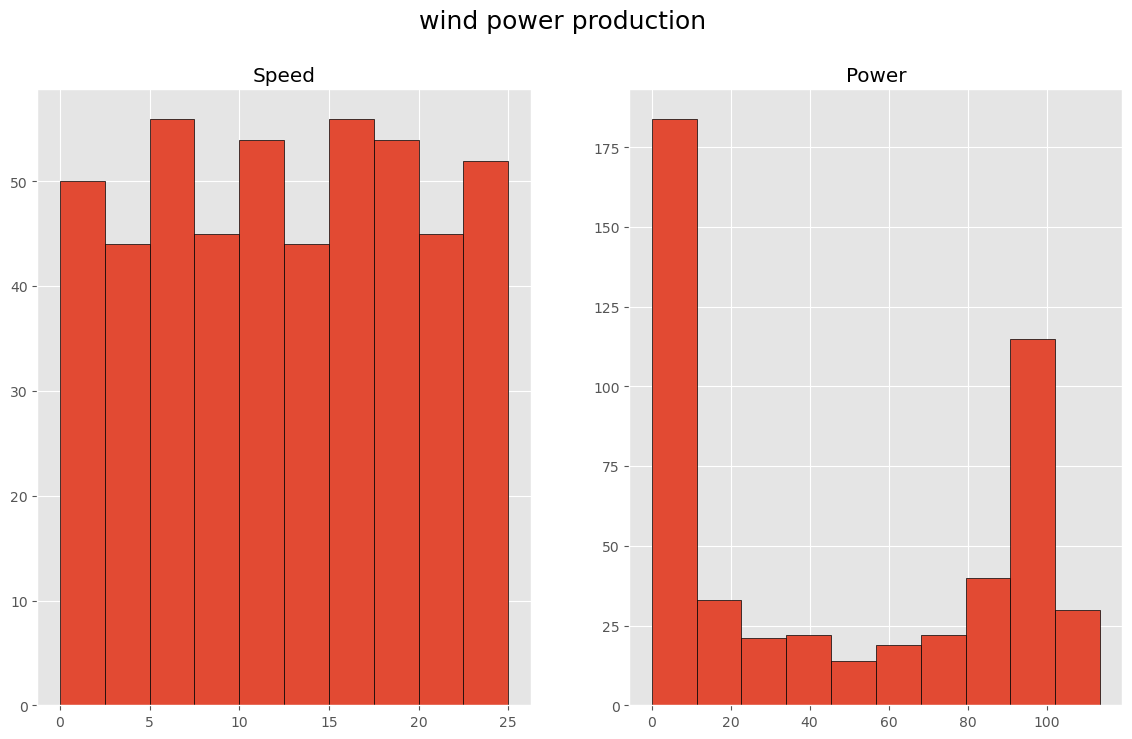

In [6]:
fig, [ax1, ax2] =plt.subplots(1, 2)
fig.suptitle("wind power production")
ax1.set_title("Speed")
ax2.set_title("Power")
ax1.hist(df.speed, edgecolor="black")
ax2.hist(df.power, edgecolor="black")

# Show the plots.
plt.show()

As we can see data does not appear to attain normal distribution and it is difficult to say which type of distribution will fit any of the variables with any degree of certainty. I will run some tests to confirm this

[Text(0.5, 1.0, 'Q-Q Test - power'), Text(0, 0.5, 'power')]

<Figure size 1400x800 with 0 Axes>

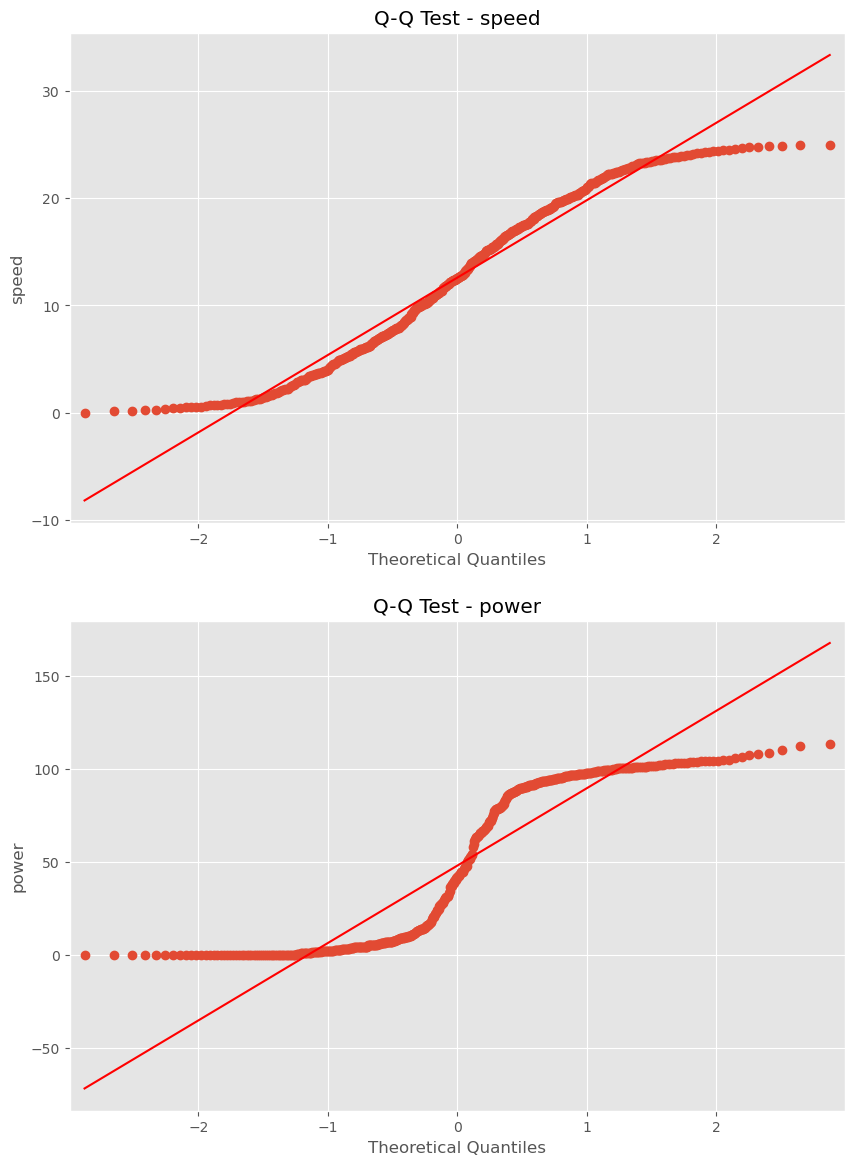

In [7]:
from statsmodels.graphics.gofplots import qqplot
plt.figure()

fig, ax = plt.subplots(2,1, figsize=(10, 14))

# plot qq charts with data
qqplot(df['speed'],ax = ax[0], line='s', )
qqplot(df['power'],ax = ax[1], line='s', )




# set title and axis labels
ax[0].set(title='Q-Q Test - speed', ylabel = 'speed' )
ax[1].set(title='Q-Q Test - power', ylabel = 'power')

running a qq test to confirm data is not of a normal disturbution as we can see power is quite skewed, 

In [8]:
import warnings
import scipy.stats as st
def get_best_distribution(df):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(df)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(df, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [9]:
get_best_distribution(df['speed'])

p value for norm = 0.0225408186055381
p value for exponweib = 9.141457310193858e-89
p value for pareto = 2.144029355479189e-12
p value for weibull_max = 2.595339150941573e-182
p value for weibull_min = 0.011034902604552909
p value for skewnorm = 0.02251185748021312


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:5001: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:5001: RuntimeWarning: overflow encountered in scalar multiply
  fac1 = a / np.pi * np.exp(gamma)


p value for norminvgauss = 0.020382449298167273
p value for powernorm = 0.0037370183879680617
p value for uniform = 0.9979378103495921
 
Best fitting distribution: uniform
Best p value: 0.9979378103495921
Parameters for the best fit: (0.0, 25.0)


In [10]:
get_best_distribution(df['power'])

p value for norm = 1.5449329008359337e-16
p value for exponweib = 5.316930354231246e-73
p value for pareto = 3.027194204142864e-79
p value for weibull_max = 1.8851647213771997e-291
p value for weibull_min = 7.880363159975487e-10
p value for skewnorm = 1.308972115880688e-23
p value for norminvgauss = 4.9015605651342825e-23
p value for powernorm = 3.7084025391011053e-19
p value for uniform = 1.7155342844656695e-33
 
Best fitting distribution: weibull_min
Best p value: 7.880363159975487e-10
Parameters for the best fit: (0.8324727310387517, -9.493314122434549e-27, 50.801594180532014)


the above confirms that speed is unifrom while power is skewed

Data Preprocessing.
Prior to building models the data should undergo data preprocessing.

There are 4 steps:

1. Removing Outliers
2. Creating arrays for the speed and the power.
3. Scaling to account for the difference in scale of the variables.
4. Creating the training and test data sets.


1. Removing Outliers.
The first step is to remove the outliers from our data set

In [11]:
df_new = df.drop(df[(df.power == 0) & (df.speed > 5) & (df.speed < 24)].index)
df_new

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


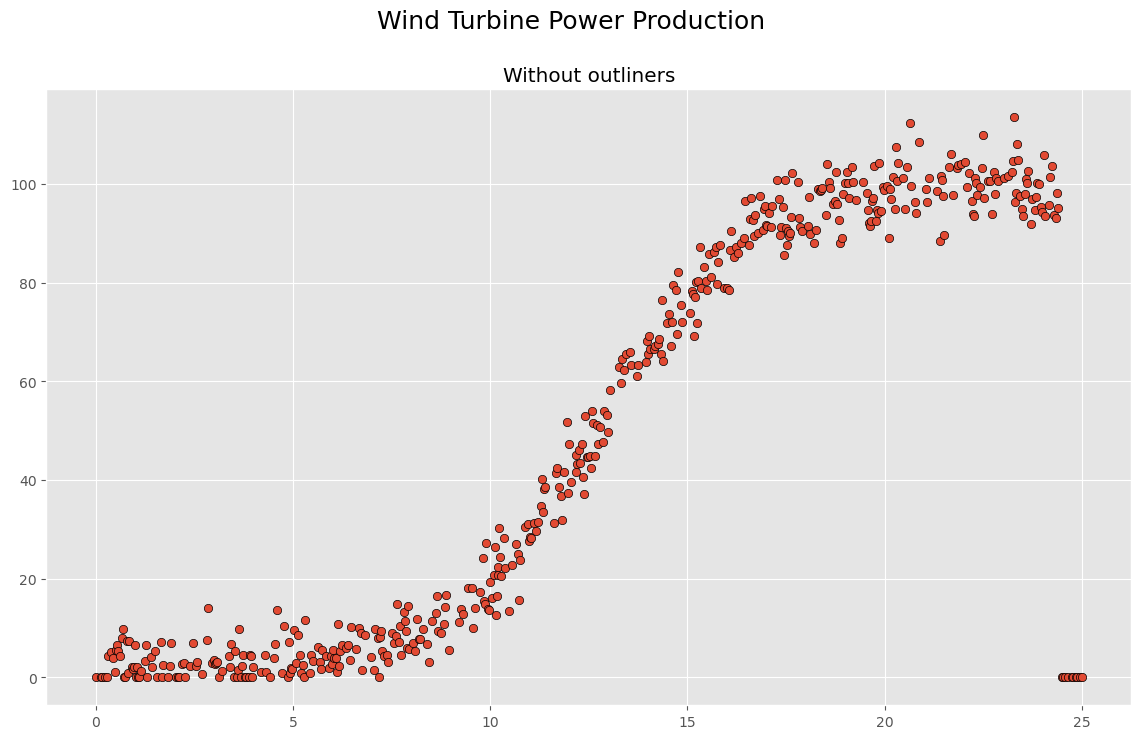

In [12]:
fig, ax = plt.subplots()
fig.suptitle("Wind Turbine Power Production")
ax.set_title("Without outliners")
ax.scatter(df_new.speed, df_new.power, edgecolor="black")
plt.show()

# 2. Creating Arrays for the Speed and the Power Variables.
Now the data set should be separated for speed and power values.

In [13]:
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values
x = np.array(speed)
y = np.array(power)

# 3. Scaling.
Next we can scale the variables. By comparing different scalers I reached the conclusion that the best results are achieved with MinMaxScaler. 

In [15]:
X_scaled = (x - np.min(x)) / np.ptp(x)
y_scaled = (y - np.min(y)) / np.ptp(y)

# The scaled data set.
df_rescaled = pd.DataFrame({"speed":X_scaled, "power":y_scaled})
df_rescaled

,speed,power
0,0.000,0.0
1,0.005,0.0
2,0.006,0.0
3,0.009,0.0
4,0.011,0.0
...,...,...
482,0.991,0.0
483,0.994,0.0
484,0.995,0.0
485,0.998,0.0


# 4. Creating the Training and Test Data sets.
We will build our model on the training set and evaluate its performance on the test set.

In [17]:
shuffle_df = df_rescaled.sample(frac=1, random_state=1)

# Define a size for your train set 
train_size = int(0.7 * len(df_rescaled))

# Split the data on training and test
speed_train, speed_test = shuffle_df.speed[:train_size].values, shuffle_df.speed[train_size:].values
power_train, power_test = shuffle_df.power[:train_size].values, shuffle_df.power[train_size:].values

# Print the shape of the new sets.
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")


Training set: (340,), (340,)
Test set: (147,), (147,)


Build, Predict, and Evaluate the Models with NumPy

Simple Linear Regression.

In [20]:
linear = poly.fit(speed_train, power_train, 1)
linear

Polynomial([0.42812243, 0.55525802], domain=[0., 1.], window=[-1.,  1.], symbol='x')

Now that we have the model created, we can make predictions on the training and test data and plot them along with the actual data.

In [22]:
y_train_linear = linear(speed_train)
y_test_linear = linear(speed_test)

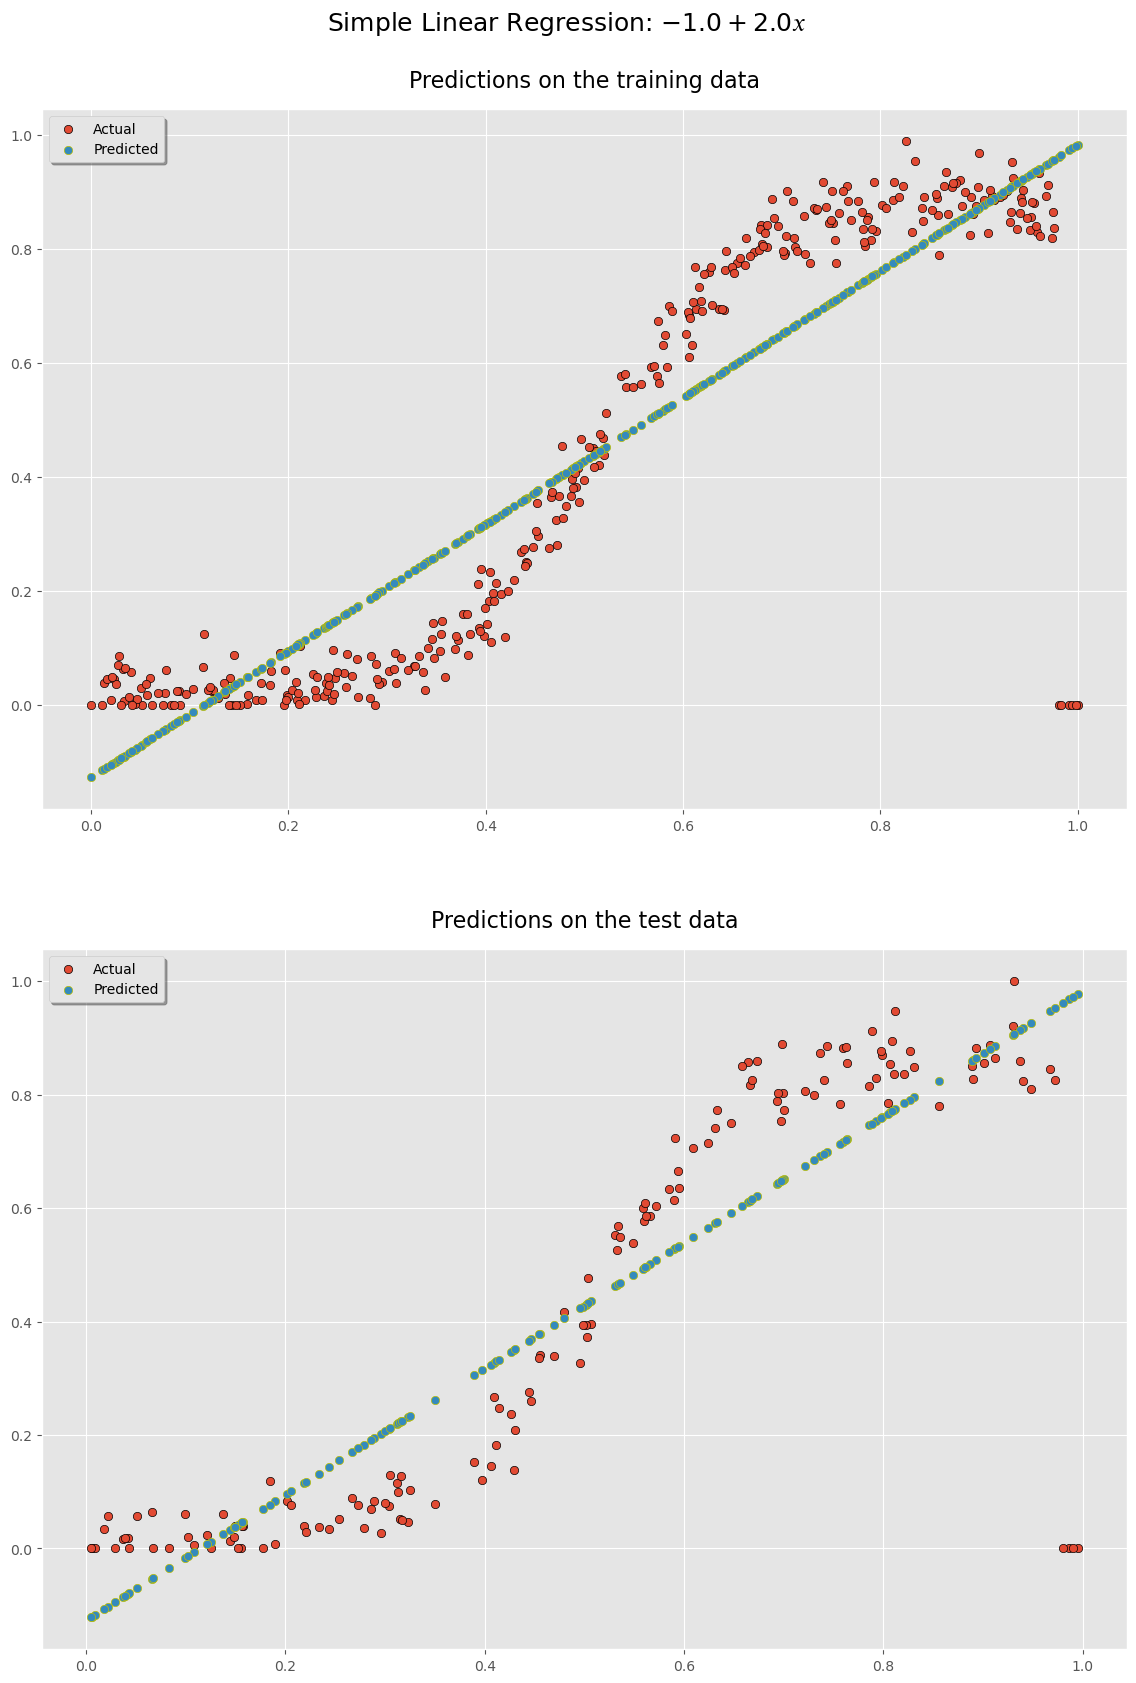

In [25]:
def plot(pred_train, pred_test, title):
    """Plot the actual and predicted data."""
    # Create a figure, axis and titles.
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(14,20))
    fig.suptitle(f"{title}", y = 0.93)
    ax1.set_title("Predictions on the training data",y=1.02, fontsize=16)
    ax2.set_title("Predictions on the test data",y=1.02, fontsize=16)

    # Plot the actual training data and predictions.
    ax1.scatter(speed_train, power_train, edgecolor="black",  label="Actual")
    ax1.scatter(speed_train, pred_train, edgecolor="y", label="Predicted")

    # Plot the actual test data and predictions.
    ax2.scatter(speed_test, power_test, edgecolor="black",  label="Actual")
    ax2.scatter(speed_test, pred_test, edgecolor="y", label="Predicted")

    # Show and lock the legend.
    ax1.legend(loc='upper left', shadow=True)
    ax2.legend(loc='upper left', shadow=True)

    # Show the plot.
    plt.show()

# Plot the actual and predicted data for simple linear regression.
plot(y_train_linear, y_test_linear, "Simple Linear Regression: $-1.0+2.0𝑥$")
    
    
    
    

It is clear from the the above plots that Simple Linear Regression underfits our data. Furthermore, it does not reflect the downward trend after the speed reaches about 24.4 m/s. Finally, it predicts negative values and the variables in the original data set are non-negative.